In [2]:
# Data Manipulation and Visualization 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly_express as px

#Hide API Key 
import creds

# setting theme style and seaborn Palette 
sns.set_theme(context = 'notebook', style='darkgrid', palette='muted')


from fredapi import Fred


# 1. Create a Fred Object

In [3]:
fred = Fred(api_key=creds.fred_key)

In [4]:
# Search for economic data on Fred

sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-11-13,2023-11-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-11-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-13 09:35:01-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-11-13,2023-11-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-10-31 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2023-11-13,2023-11-13,S&P 500,2013-11-11,2023-11-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-10 19:10:58-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-11-13,2023-11-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-11-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-11-13 09:35:09-06:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2023-11-13,2023-11-13,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...


<Axes: title={'center': 'S&P 500'}>

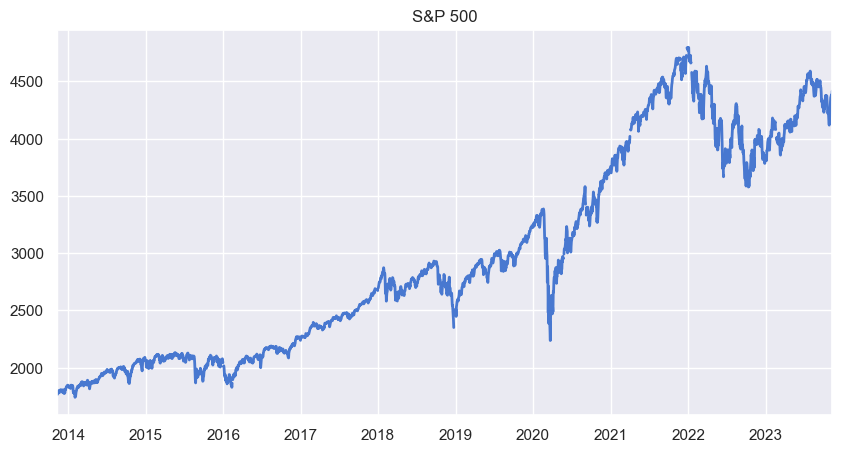

In [6]:
# Pull Raw Data 

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)


# Pull and Join Multiple Data Series 

In [7]:
# filtering a unemployment rate dataframe with a Monthly update frequency  
 
uemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))     # search for umemployment rate times series in Fred that has a monthly frequency
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')  # Query Seasonally Adjusted and Percent as units 
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]  # filter titles to those containing the phrase 'Unemployment Rate'
uemp_df = uemp_df.loc[uemp_df['id'].str.len() == 4]   # filter Series id to those with 4 words only (lenght of the string)

In [8]:
# dataframe with time series for all the US States 
uemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-11-13,2023-11-13,Unemployment Rate in California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:02-05:00,59,None
TXUR,TXUR,2023-11-13,2023-11-13,Unemployment Rate in Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:02-05:00,52,None
NYUR,NYUR,2023-11-13,2023-11-13,Unemployment Rate in New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:03-05:00,49,None
FLUR,FLUR,2023-11-13,2023-11-13,Unemployment Rate in Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,46,None
OHUR,OHUR,2023-11-13,2023-11-13,Unemployment Rate in Ohio,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:52:03-05:00,37,None
ALUR,ALUR,2023-11-13,2023-11-13,Unemployment Rate in Alabama,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:04-05:00,35,None
MIUR,MIUR,2023-11-13,2023-11-13,Unemployment Rate in Michigan,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:05-05:00,33,None
MNUR,MNUR,2023-11-13,2023-11-13,Unemployment Rate in Minnesota,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:10-05:00,30,None
MAUR,MAUR,2023-11-13,2023-11-13,Unemployment Rate in Massachusetts,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-24 08:53:06-05:00,34,None


In [9]:
all_results = []


for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [10]:
uemp_states = pd.concat(all_results, axis=1)
uemp_states = uemp_states.drop('PRUR', axis=1) # remove Puerto Rico 
uemp_states

,CAUR,TXUR,NYUR,FLUR,OHUR,ALUR,MIUR,MNUR,MAUR,PAUR,...,KSUR,MEUR,DCUR,WYUR,NEUR,RIUR,SDUR,DEUR,NHUR,VTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,9.9,6.0,10.5,8.0,...,4.2,8.7,8.7,4.1,3.3,7.8,3.3,8.0,6.5,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,9.9,6.0,10.5,8.1,...,4.2,8.7,8.7,4.1,3.3,7.8,3.3,8.0,6.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,9.9,5.9,10.5,8.1,...,4.2,8.6,8.6,4.1,3.3,7.7,3.2,8.0,6.5,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,9.8,5.8,10.3,8.1,...,4.2,8.6,8.5,4.0,3.2,7.7,3.1,8.1,6.5,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,9.6,5.7,10.1,8.1,...,4.2,8.5,8.4,3.9,3.1,7.7,3.1,8.3,6.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.5,4.1,3.9,2.6,3.6,2.2,3.7,2.9,2.8,4.0,...,2.9,2.4,5.1,3.3,1.9,3.0,1.9,4.2,1.9,2.1
2023-06-01,4.6,4.1,3.9,2.6,3.4,2.2,3.6,2.9,2.6,3.8,...,2.8,2.4,5.1,3.1,1.9,2.9,1.8,4.2,1.8,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.3,2.1,3.6,3.0,2.5,3.5,...,2.7,2.4,5.0,3.0,2.0,2.8,1.9,4.1,1.7,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.4,2.1,3.7,3.1,2.6,3.5,...,2.7,2.5,5.0,2.9,2.0,2.7,1.9,4.1,1.8,1.8


In [11]:
#Plot state unemployment rate 

px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State (Covid-19 impact)

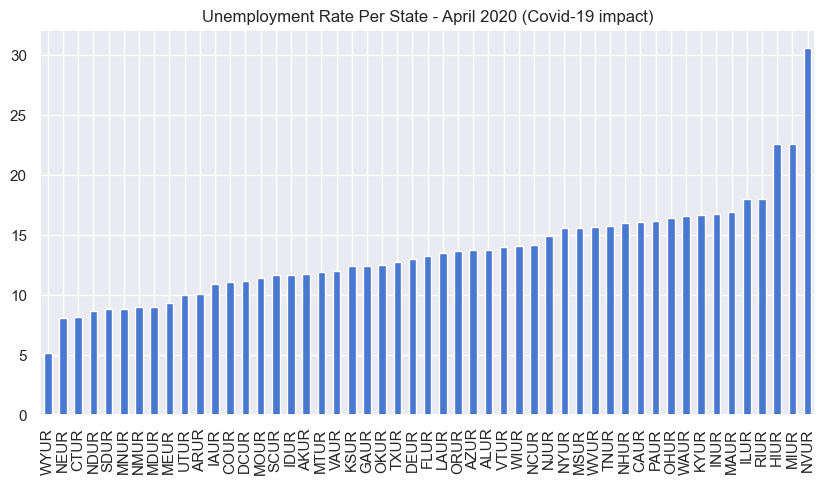

In [12]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='bar', figsize=(10,5), title='Unemployment Rate Per State - April 2020 (Covid-19 impact)')
ax.legend().remove()
plt.show()

In [13]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()  #Create a dictionary of all state names linked to it's Fred's ID.
id_to_state


{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'MIUR': 'Michigan',
 'MNUR': 'Minnesota',
 'MAUR': 'Massachusetts',
 'PAUR': 'Pennsylvania',
 'COUR': 'Colorado',
 'ILUR': 'Illinois',
 'VAUR': 'Virginia',
 'NCUR': 'North Carolina',
 'KYUR': 'Kentucky',
 'WIUR': 'Wisconsin',
 'AZUR': 'Arizona',
 'WAUR': 'Washington',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'MDUR': 'Maryland',
 'WVUR': 'West Virginia',
 'AKUR': 'Alaska',
 'HIUR': 'Hawaii',
 'ORUR': 'Oregon',
 'TNUR': 'Tennessee',
 'IAUR': 'Iowa',
 'NMUR': 'New Mexico',
 'ARUR': 'Arkansas',
 'MOUR': 'Missouri',
 'UTUR': 'Utah',
 'SCUR': 'South Carolina',
 'NDUR': 'North Dakota',
 'NVUR': 'Nevada',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'IDUR': 'Idaho',
 'CTUR': 'Connecticut',
 'OKUR': 'Oklahoma',
 'MTUR': 'Montana',
 'PRUR': 'Puerto Rico',
 'MSUR': 'Mississippi',
 'KSUR': 'Kansas',
 'MEUR': 'Maine',
 'DCUR': 'the District of Columbia',
 'WYUR': 'Wyoming',
 'NEU

In [14]:
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]


In [15]:
uemp_states

,California,Texas,New York,Florida,Ohio,Alabama,Michigan,Minnesota,Massachusetts,Pennsylvania,...,Kansas,Maine,the District of Columbia,Wyoming,Nebraska,Rhode Island,South Dakota,Delaware,New Hampshire,Vermont
1976-01-01,9.2,5.8,10.3,9.7,8.1,6.6,9.9,6.0,10.5,8.0,...,4.2,8.7,8.7,4.1,3.3,7.8,3.3,8.0,6.5,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,6.6,9.9,6.0,10.5,8.1,...,4.2,8.7,8.7,4.1,3.3,7.8,3.3,8.0,6.5,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,6.6,9.9,5.9,10.5,8.1,...,4.2,8.6,8.6,4.1,3.3,7.7,3.2,8.0,6.5,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,6.5,9.8,5.8,10.3,8.1,...,4.2,8.6,8.5,4.0,3.2,7.7,3.1,8.1,6.5,8.6
1976-05-01,9.0,5.9,10.1,9.3,7.8,6.4,9.6,5.7,10.1,8.1,...,4.2,8.5,8.4,3.9,3.1,7.7,3.1,8.3,6.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,4.5,4.1,3.9,2.6,3.6,2.2,3.7,2.9,2.8,4.0,...,2.9,2.4,5.1,3.3,1.9,3.0,1.9,4.2,1.9,2.1
2023-06-01,4.6,4.1,3.9,2.6,3.4,2.2,3.6,2.9,2.6,3.8,...,2.8,2.4,5.1,3.1,1.9,2.9,1.8,4.2,1.8,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.3,2.1,3.6,3.0,2.5,3.5,...,2.7,2.4,5.0,3.0,2.0,2.8,1.9,4.1,1.7,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.4,2.1,3.7,3.1,2.6,3.5,...,2.7,2.5,5.0,2.9,2.0,2.7,1.9,4.1,1.8,1.8


In [16]:
px.line(uemp_states)

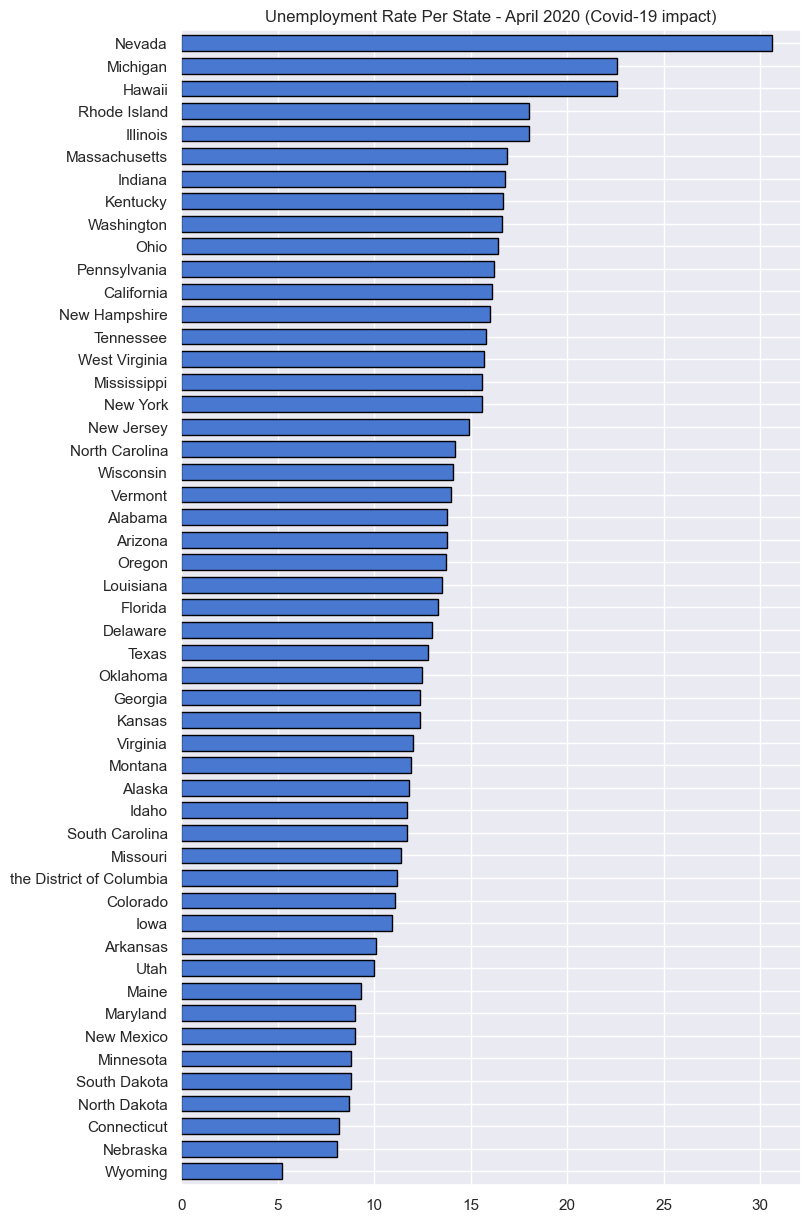

In [17]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8,15), width=0.7, edgecolor = 'black',
          title='Unemployment Rate Per State - April 2020 (Covid-19 impact)')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [39]:
# filtering a unemployment rate dataframe with a Monthly update frequency  
 
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))     # search for umemployment rate times series in Fred that has a monthly frequency
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')  # Query Seasonally Adjusted and Percent as units 
part_df = part_df.loc[uemp_df['title'].str.contains('Participation Rate')]  # filter titles to those containing the phrase 'Unemployment Rate'
part_df = part_df.loc[uemp_df['id'].str.len() == 7]   # filter Series id to those with 4 words only (lenght of the string)
part_df = part_df.drop(index='CIVPART')  # drop one series ID 
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2023-11-13,2023-11-13,Labor Force Participation Rate for California,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:05-05:00,16,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2023-11-13,2023-11-13,Labor Force Participation Rate for Kentucky,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:01-05:00,27,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2023-11-13,2023-11-13,Labor Force Participation Rate for New York,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:06-05:00,22,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2023-11-13,2023-11-13,Labor Force Participation Rate for Alabama,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:09-05:00,8,A state's labor-force participation rate is th...
LBSSA55,LBSSA55,2023-11-13,2023-11-13,Labor Force Participation Rate for Wisconsin,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,22,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2023-11-13,2023-11-13,Labor Force Participation Rate for Florida,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,19,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2023-11-13,2023-11-13,Labor Force Participation Rate for Michigan,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,19,A state's labor-force participation rate is th...
LBSSA48,LBSSA48,2023-11-13,2023-11-13,Labor Force Participation Rate for Texas,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,16,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2023-11-13,2023-11-13,Labor Force Participation Rate for Minnesota,1976-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-20 09:01:03-05:00,16,A state's labor-force participation rate is th...
